Dr. René Cejas Bolecek, 2016
Análisis Numérico del Profesorado y Licenciatura en Matemáticas de la Universidad de Comahue Regional Bariloche, Argentina

https://github.com/renexdev/anNumCRUB16

# Interpolation

- [Lagrange’s method](#Lagrange’s method)
- [Newton’s method](#Newton’s method)
- [Cubic Spline](#Cubic Spline)
- [Least-Squares Fit](#Least-Squares Fit)

# Lagrange’s method

Use Lagrange’s method to determine y at x = 1
 Sol:  1.0


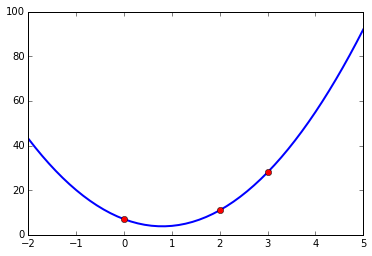

In [31]:
# Numerical Methods in Engineering with Python 3 3rd Edition (2013)
# by Jaan Kiusalaas
# Publisher: Cambridge University Press
# ISBN-10: 1107033853
# ISBN-13: 978-1107033856
# EXAMPLE 3.1  p. 112

import sys
sys.path.append("./../../modules/")
import numpy as np
import matplotlib.pyplot as plt
from lagrangeV1 import *
%matplotlib inline

points = []
#(x_i,y_i) to interpolate
points =[(0,7),(2,11),(3,28)]

P = lagrange(points)

x = np.linspace(-2.0, 5.0, num=50)
print "Use Lagrange’s method to determine y at x = 1\n Sol: ", x[np.where((x>0.99)*(x<1.1))][0]
y = map(P, x)

#Plot Lagrange interpolation
plt.plot( x, y, linewidth=2.0)
#Plot data points
x_list = []
y_list = []
for x_p, y_p in points:
    x_list.append(x_p)
    y_list.append(y_p)
plt.plot(x_list, y_list,  'ro')
plt.show()

$\textbf{Tareas}$: 
- Resolver en papel el ejercicio 3.1 y comparar con los resultados numéricos.


# Newton’s method

Use Newton’s method to interpolate f(x) = 4.8*cos(pi*x/20.0) in x:[0,8]

 x    yInterp   yExact
-----------------------
0.0   4.80002   4.80000
0.5   4.78518   4.78520
1.0   4.74088   4.74090
1.5   4.66736   4.66738
2.0   4.56507   4.56507
2.5   4.43462   4.43462
3.0   4.27683   4.27683
3.5   4.09267   4.09267
4.0   3.88328   3.88328
4.5   3.64995   3.64995
5.0   3.39411   3.39411
5.5   3.11735   3.11735
6.0   2.82137   2.82137
6.5   2.50799   2.50799
7.0   2.17914   2.17915
7.5   1.83686   1.83688
8.0   1.48329   1.48328


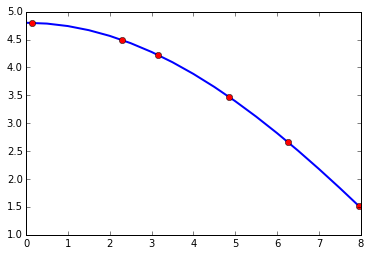

In [27]:
# EXAMPLE 3.4  p. 114
import sys
sys.path.append("./../../modules/")
from numpy import array,arange
from math import pi,cos
import matplotlib.pyplot as plt
from newtonPoly import *
%matplotlib inline

fn = lambda x: 4.8*cos(pi*x/20.0)

xData = array([0.15,2.3,3.15,4.85,6.25,7.95])
#yData = array()
yData = array([fn(xData[i]) for i in range(len(xData))])
a = coeffts(xData,yData)
yNewton = []
print "Use Newton’s method to interpolate f(x) = 4.8*cos(pi*x/20.0) in x:[0,8]\n"
print " x    yInterp   yExact"
print "-----------------------"
xm = 0.0
xM = 8.1
for x in arange(xm,xM,0.5):
    yNewton.append(evalPoly(a,xData,x))
    yExact = fn(x)
    print "%3.1f %9.5f %9.5f"% (x,evalPoly(a,xData,x),yExact)
plt.plot( arange(xm,xM,0.5), yNewton, linewidth=2.0)
plt.plot(xData, yData,  'ro')
plt.show()

$\textbf{Tareas}$: 
- Estudiar el comportamiento de las interpolaciones polinomiales al extender el rango. Tip: cambiar los valores de xm y
xM. Que conclusiones puede sacar?

# Rational Function Interpolation

Interpolar los datos utilizando Neville y método racional.



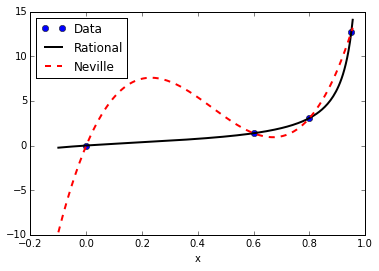

In [65]:
import sys
sys.path.append("./../../modules/")
from newtonPoly import *
import numpy as np
from rationalV1 import *
from neville import *
import matplotlib.pyplot as plt
%matplotlib inline

print "Interpolar los datos utilizando Neville y método racional.\n"

#xData = np.array([0.1,0.2,0.5,0.6,0.8,1.2,1.5])
#yData = np.array([-1.5342,-1.0811,-0.4445,-0.3085, \
#-0.0868,0.2281,0.3824])
xData = np.array([0.0,0.6,0.8,0.95])
yData = np.array([0.0,1.3764,3.0777,12.7062])


x = np.arange(-0.1,0.96,0.005)
n = len(x)
y = np.zeros((n,2))
for i in range(n):
        y[i,0] = rational(xData,yData,x[i])
        y[i,1] = neville(xData,yData,x[i])
plt.plot(xData,yData,'o',x,y[:,0],'k-',x,y[:,1],'r--', lw = 2)
plt.xlabel('x')
plt.legend(('Data','Rational','Neville'),loc = 0)
plt.show()

$\textbf{Tareas}$: 
- Agregar los resultados correspondientes a una interpolación de Newton. Y comparar los métodos. Que conclusiones puede sacar?.
- Resolver ejemplo 3.6 p. 118 de libro.

# Cubic Spline

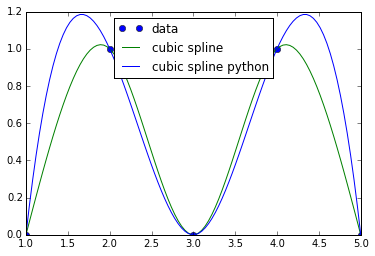

In [6]:
import sys
sys.path.append("./../../modules/")
from numpy import array
import numpy as np
from cubicSpline import *
import matplotlib.pyplot as plt
from scipy import interpolate

%matplotlib inline
xData = array([1,2,3,4,5],dtype=float)
yData = array([0,1,0,1,0],dtype=float)
k = curvatures(xData,yData)
x = np.linspace(min(xData), max(xData), num=100)
y = array([evalSpline(xData,yData,k,x[i]) for i in range(len(x)) ])

#Python interpolation 
#http://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

tck = interpolate.splrep(xData, yData, s=0)
yPy = interpolate.splev(x, tck, der=0)
 
plt.plot(xData, yData, 'o', x, y , '-', x, yPy , 'b')
plt.legend(['data', 'cubic spline', 'cubic spline python'], loc='best')
plt.show()

#while 1:
#    try: x = eval(raw_input("\nx ==> "))
#    except SyntaxError: break
#    print "y =",evalSpline(xData,yData,k,x)


$\textbf{Tareas}$: 
- Comparar método Cubic Spline estudiado en teoría con la implementación de de Python. Porqué se ven diferentes?. Que pasa cuando aumento el número de puntos medidos? 

# Least-Squares Fit


Degree of polynomial ==> 1
Coefficients are:
[ 2.92672414  0.64310345]
Std. deviation = 0.151903629462
x_mean = 1.7  y_mean = 4.02


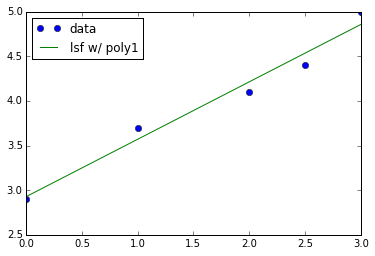

In [ ]:
import sys
sys.path.append("./../../modules/")
from numpy import array
import numpy as np
from polyFit import *
import matplotlib.pyplot as plt

%matplotlib inline

xData = array([0.0,1.0,2.0,2.5,3.0])
yData = array([2.9, 3.7, 4.1, 4.4, 5.0])

xPlot = np.linspace(min(xData), max(xData), num=100)

while 1:
    try:
        m = eval(raw_input("\nDegree of polynomial ==> "))
        coeff = polyFit(xData,yData,m)
        print "Coefficients are:\n",coeff
        print "Std. deviation =",stdDev(coeff,xData,yData)
        print "x_mean =",mean(xData)," y_mean =",mean(yData)
        #lsf = lambda x: coeff[i]*x**i for i in range(len(coeff)) # Target function"
        yPlot = array([ sum([p[1]*(xPlot[i]**p[0]) for p in enumerate(coeff)]) for i in range(len(xPlot)) ])
        plt.plot(xData, yData, 'o', xPlot, yPlot , '-')
        plt.legend(['data', 'lsf w/ poly%d'%(m)], loc='best')
        plt.show()
    except SyntaxError: break

$\textbf{Tareas}$: 
- Realizar los calculos en papel del ejercicio 3.10 del libro (p. 136) y comparar con los valores obtenidos de la implementacion del módulo polyFit. Calcular los residuos. Repetir para el ejercicio 3.11 (p. 137)